# **COVID-19: Catalyst for US Prison Reform** 
### **_BIOL-282: Modeling and Simulation in Public Health_**
Alyssa Vu, Allie Stankewich, Rheannon Loth and Irina Koleva

### **Abstract:**
 
COVID-19 has had a devastating impact globally over the last two years, and there have been disproportionately severe SARS-CoV-2 infections and outcomes in prisons. Consequently, the United States federal prison demographic was identified as a vulnerable population. Background research showed that American prisons have been historically overcrowded and filled with individuals who are given disproportionately harsh sentences for the crimes they committed - largely due to the War on Drugs. An SIRD model was built to predict COVID-19 infections and outcomes with various mitigation scenarios. The models showed that an effective masking strategy will reduce contact rate and thus decrease overall number of infections and deaths. Additionally, they showed that depopulating prisons without a targeted masking strategy will reduce contact rate and thus decrease overall number of infections and deaths, but it won’t be as effective as using a targeted masking strategy. Thirdly, the models showed that vaccinating a majority of both inmates and staff will be most effective to flatten the infection curve. Proposed recommendations include implementing a multi-pronged approach of proper masking and vaccination campaigns. A second and broader recommendation is the continued decriminalization of marijuana as well as massive legal reform regarding currently illegal substances, with the ultimate goal of significantly depopulating prisons. Drug reform will prevent needless incarceration of already marginalized and vulnerable communities, as well as decrease the length of time inmates are kept in the prison system if they do become incarcerated. 


### Background

The United States is the country with the highest incarceration rate in the world. The American criminal justice system holds more than 2.3 million people in 1,719 state prisons and 102 federal prisons, with the most common reason for federal convictions being nonviolent drug offenses. Almost half a million people across the United States are incarcerated due to a drug offense. The horror of the United States prison system has only amplified since the onset of the COVID-19 pandemic. Particularly at the federal level, the lack of feasibility of social distancing along with the general failure of the government and prison staff to enable and enforce mitigation measures has contributed to many infections and deaths among prison populations.
 
Health Risks & Comorbidities: 
 
 Well before the COVID-19 pandemic, it was known that incarcerated populations are more susceptible to underlying health risks and are more likely to have chronic health conditions and infectious diseases compared to the general population. An estimated 40% of the incarcerated population in America suffers from chronic health conditions, with a disproportionately high prevalence of tuberculosis (TB), human immunodeficiency virus (HIV), and sexually transmitted diseases (STDs). For example, 21% of prisoners and 14% of jail inmates reported having tuberculosis, hepatitis B or C, or other STDs (excluding HIV or AIDS), compared to 5% of the general population. High blood pressure and hypertension are currently the highest risk factors for incarcerated people, followed by asthma and arthritis. 

The population entering prisons has higher rates of pre-existing conditions including obesity and weakened immune systems from drug or alcohol abuse. Incarcerated youth have higher morbidity and mortality rates. Those who enter in a relatively healthy state also frequently deteriorate due to environmental conditions such as the trauma and the poor nutritional quality of the diets available. Contracting diabetes is rather common. All of these conditions increase susceptibility to more adverse effects or fatality from COVID-19. Additionally, mental health and suicide rates skyrocket, becoming the leading cause of deaths in jail mortalitities between 2000-2016, followed by heart disease. 

COVID-19 has exacerbated pressures on what was already insufficient health care in prisons. There continues to be a grave shortage in physical and mental health treatment, prescriptions are frequently not filled or complete, and staffing is increasingly lacking or inadequate. During this pandemic, workers have been assigned to clinical and medical roles in correctional facilities who have no formal medical education or background, and some facilities do not have access to care at all. Even when it is available, there is a significant lack of trust from prisoners toward medical caregivers, which made COVID-19 testing and vaccinations more challenging. Too often, prisons and jails are wrongfully used as substandard hospital alternatives for individuals who require direct mental and/or physical health care, but are left with a major deficiency of resources.

Many people have been reinfected with COVID-19 despite being previously infected or even vaccinated. However, vaccinated people have much lower risk of reinfection compared to unvaccinated individuals. Data and reports have shown that the responses of federal prisons, state and county jails, and juvenile detention centers all had lackluster responses to the COVID-19 pandemic. Federal prisons in particular lacked proper testing, tracing, and isolation practices, did not enforce appropriate mask use by staff and inmates (some states, such as Florida, even banned mask use in prisons), and many staff wholly refused to get vaccinated. Even more worryingly, there was a distinct lack of access to vaccination for inmates. Moreover, a majority of inmates who are in prison for drug charges continue to be given disproportionately harsh and long sentences. These long lengths of stay in prison increase the risk for reinfection, which is a terrifying implication in a pandemic which has already and will continue to jeopardize millions of lives.



### Method description:
- **Improving based on SIR model**: 
    - Based on the traditional SIR model, we add another compartment D to represent the number of people who dies from COVID-19. Furthermore, we subdivides the total population into staff and innamtes and doubles the compartments to represent staff and inmates separately: 
        - S<sub>a</sub>: number of susceptible inmate
        - I<sub>a</sub>: number of infected inmate
        - R<sub>a</sub>: number of recovered inmate
        - D<sub>a</sub>: number of deceased inmate
        - S<sub>b</sub>: number of susceptible staff
        - R<sub>b</sub>: number of infected staff
        - R<sub>b</sub>: number of recovered staff
        - D<sub>b</sub>: number of deceased staff
    - We further incorporate reinfection into our model so that people in Recovered compartment can go back to the Susceptible compartment. We found that staff and inmate have different contact rate. On average, there is one staff for every four inmates and there are 5 inmates in a cell. Assuming that every staff interact with at least 1 other staff, this means that the contact rate staff is 5 and the contact rate of inmates is 6. 
    - We also add a scaling factor for different type of interactions. Assuming that staff versus staff is the safest interaction, follwed by staff versus inmate, and inmate versus inmate is the least safest one since inmates are living in poor condition, the baseline is 1 for staff versus staff interaction with a scaling of 1.5 and 2 for staff versus inmate and inmate versus inmate, respectively. 
    - Fatality rate much higher for inmates compared to staff so we use different fatality rate for each subpopulation.  
    
    
- **Assembling the model dynamics**:
    - Subscript a represents inmates while subscript b represent staff
    - infection rate: r<sub>i_x</sub> = trans * contx / Nx 
      - trans = transmissibility of COVID-19
      - cont = average contact individuals per person
      - N = total number of subpopulation
    - death rate r<sub>d_x</sub> =  fatality_ratex / death_period
    - recovery rate r<sub>r_x</sub> = (1 - fatality_ratex) / recovery_period
    - reinfection rate r<sub>re</sub> is a percentage of total recovery cases
    - weights w<sub>1</sub>, w<sub>2</sub>, w<sub>3</sub> are scaling factors for different type of contacts: staff versus staff, staff versus inmate, and inmate versus inmate.

Other parameters are listed in the table below:

|Parameters|Symbol|Model value| |
| --- | --- | --- |--- |
| | | Staff | Inmates |
|Subpopulation| S |750|250|
|Transmissibility| trans | 0.1|  | 
|Time to recover| inf_period |12 days| | 
|Time to die| death_period| 18.5 days| | 
|Fatality rate| fatality_rate| 0.008 | 0.02| 
|Contact rate| cont| 5 | 6|
|Scaling factor for staff| |1 | 1.5 |
|Scaling factor for inmate| | 1.5|2|
|Reinfection rate| r_re| 0.01|

Thus, we have the following system of differential equation:

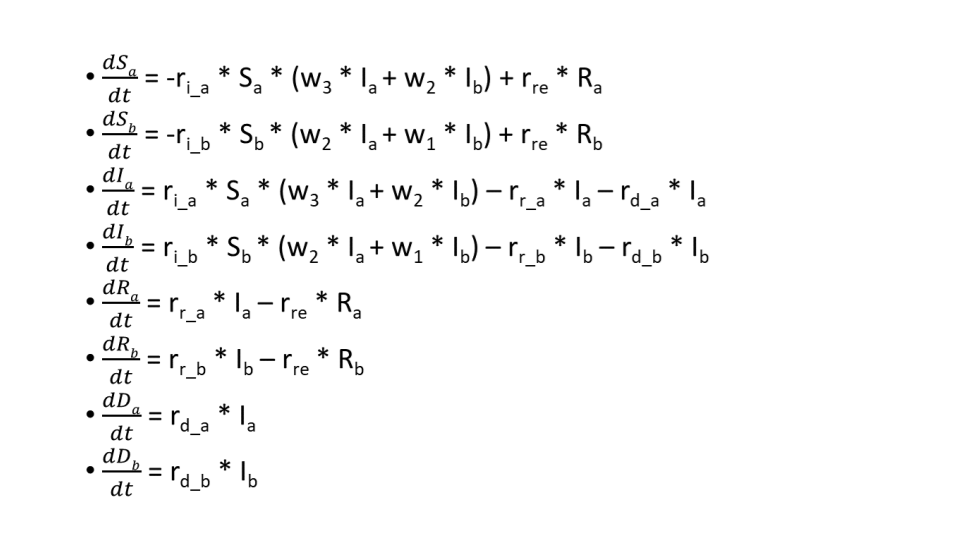

### Step 1: Load Packages and Libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Step 2: Defining Common Parameters

In [2]:
trans = 0.1
inf_period = 12
death_period = 18.5
fatala = 0.02
fatalb = 0.008

T = 200
dt = 1
nsteps = int(T / dt)
t = np.linspace(0, T, nsteps)

### Step 3: Plotting figures for each mitigation strategy

## Depopulation Strategy

Code to produce graphs of infection and death for depopulation model. Simulates various levels of depopulation - lower contact rate corresponds to stronger depopulation strategy.

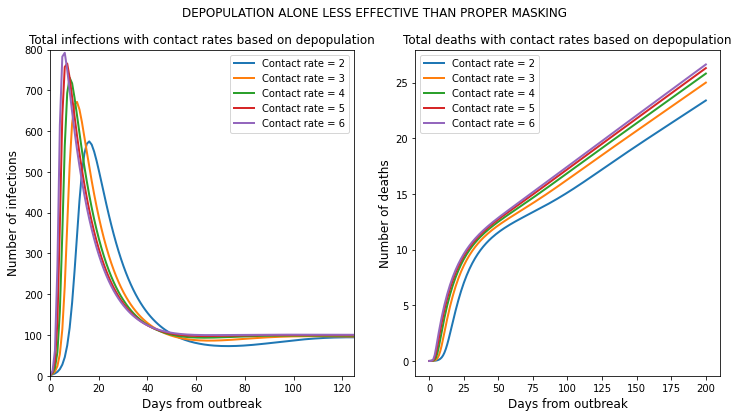

In [3]:
def f(y,t):
    Sa = y[0]
    Sb = y[1]
    Ia = y[2]
    Ib = y[3]
    Ra = y[4]
    Rb = y[5]
    Da = y[6]
    Db = y[7]
    Na = Sa + Ia + Ra + Da
    Nb = Sb + Ib + Rb + Db
    
    r_ia = conta * trans / Na
    r_ib = contb * trans / Nb
    r_ra = (1 - fatala) / inf_period
    r_rb = (1 - fatalb) / inf_period
    r_da = fatala / death_period
    r_db = fatalb / death_period
    rein_r = .01

    dSa = -r_ia * Sa * (2 * Ia + 1.5 * Ib) + rein_r * Ra
    dSb = -r_ib * Sb * (1.5 * Ia + Ib) + rein_r * Rb
    dIa = r_ia * Sa * (2 * Ia + 1.5 * Ib) - r_ra * Ia - r_da * Ia
    dIb = r_ib * Sb * (1.5 * Ia + Ib) - r_rb * Ib - r_db * Ib
    dRa = r_ra * Ia - rein_r * Ra
    dRb = r_rb * Ib - rein_r * Rb
    dDa = r_da * Ia
    dDb = r_db * Ib
    
    return[dSa, dSb, dIa, dIb, dRa, dRb, dDa, dDb]

contact_rate_list = [2, 3, 4, 5, 6]

fig = plt.figure(figsize = (12,6))
plt.tight_layout(pad = 5)
plt.subplot(1,2,1)

Sa0 = 749
Sb0 = 249
Ia0 = 1
Ib0 = 1
Ra0 = 0
Rb0 = 0
Da0 = 0
Db0 = 0
y0 = [Sa0, Sb0, Ia0, Ib0, Ra0, Rb0, Da0, Db0]

for contact_rate in contact_rate_list:
    #comparing population of 1000 people (750 inmates, 250 staff, 1 from each group infected at beginning)   

    conta = contact_rate
    contb = contact_rate
    
    solution = odeint(f, y0, t)
    
    Ia = solution[:,2]
    Ib = solution[:,3]
    Itotal = Ia + Ib
    
    plt.plot(t, Itotal, lw=2, label='Contact rate = '+str(conta))

plt.title('Total infections with contact rates based on depopulation')
plt.xlabel('Days from outbreak',fontsize=12)
plt.ylabel('Number of infections',fontsize=12)
plt.ylim(0,800)
plt.xlim(0,125)
plt.legend(loc=0)  
plt.subplot(1,2,2)

for contact_rate in contact_rate_list:   
    conta = contact_rate
    contb = contact_rate
    
    solution = odeint(f, y0, t)
    
    Da = solution[:,6]
    Db = solution[:,7]
    Dtotal = Da + Db

    plt.plot(t, Dtotal, lw=2, label='Contact rate = ' + str(conta))

fig.suptitle("DEPOPULATION ALONE LESS EFFECTIVE THAN PROPER MASKING")
plt.title('Total deaths with contact rates based on depopulation')
plt.xlabel('Days from outbreak', fontsize=12)
plt.ylabel('Number of deaths', fontsize=12)
plt.legend(loc=0)
plt.savefig('depop graphs.png')
plt.show()

### Figure 1:
Shows total number of infections and deaths for various contact rates. A contact rate of 2 means that each individual 

## Masking Strategy

These figures manipulate the percent of the population masked within prisons. Masking is a critical mitigation strategy to reducing the number of infections and deaths in the general population but especially important within prisons, where social distancing is less feasible. Here, we predict that the more people wearing masks, the lower the contact rate will be. The models assume the masking rates of prison inmates and prison staff are the same. The new contact rates are a function of the masking rates. 

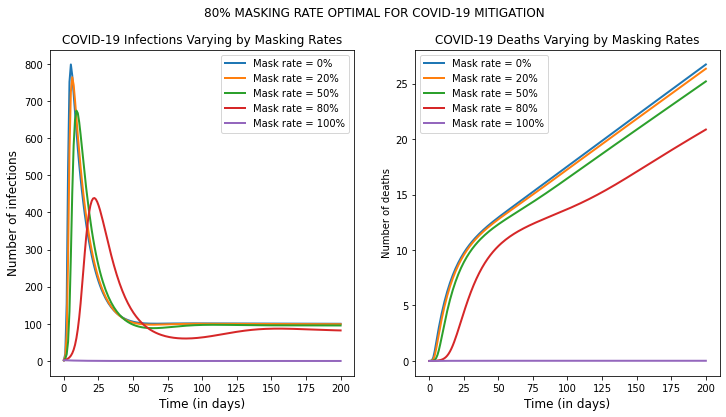

In [4]:
#create variables for contact rate for (a) inmates and (b) staff. 
conta1 = 6
contb1 = 11

#create function f to return result of differential equations which takes parameters y (initial conditions) and t (time in days). 
def f(y,t):
    #set initial conditions
    Sa = y[0]
    Sb = y[1]
    Ia = y[2]
    Ib = y[3]
    Ra = y[4]
    Rb = y[5]
    Da = y[6]
    Db = y[7]
    #calculate total subpopulations
    Na = Sa + Ia + Ra + Da
    Nb = Sb + Ib + Rb + Db
    
    #calculate rates using various parameters
    r_ia = conta * trans / Na
    r_ib = contb * trans / Nb
    r_ra = (1 - fatala) / inf_period
    r_rb = (1 - fatalb) / inf_period
    r_da = fatala / death_period
    r_db = fatalb / death_period
    rein_r = .01

    #solve differential equations and ensure they are balanced
    dSa = -r_ia * Sa * (2 * Ia + 1.5 * Ib) + rein_r * Ra
    dSb = -r_ib * Sb * (1.5 * Ia + Ib) + rein_r * Rb
    dIa = r_ia * Sa * (2 * Ia + 1.5 * Ib) - r_ra * Ia - r_da * Ia
    dIb = r_ib * Sb * (1.5 * Ia + Ib) - r_rb * Ib - r_db * Ib
    dRa = r_ra * Ia - rein_r * Ra
    dRb = r_rb * Ib - rein_r * Rb
    dDa = r_da * Ia
    dDb = r_db * Ib
    
    return[dSa, dSb, dIa, dIb, dRa, dRb, dDa, dDb]

#plot figure
fig = plt.figure(figsize = (12,6))
plt.tight_layout(pad = 5)
plt.subplot(1,2,1)

#set list of masking rates from 0 to 100%
mask_rate_list = [0, 0.2, 0.5, 0.8, 1.]

#set initial conditions
Sa0 = 749
Sb0 = 249
Ia0 = 1
Ib0 = 1
Ra0 = 0
Rb0 = 0
Da0 = 0
Db0 = 0
y0 = [Sa0, Sb0, Ia0, Ib0, Ra0, Rb0, Da0, Db0]

#loop to plot each curve for different mask rates on same figure
for mask_rate in mask_rate_list:
  #calculate contact rate for each masking rate (both inmates and staff)
  conta = conta1 * (1 - mask_rate)
  contb = contb1 * (1 - mask_rate)

  #use odeint function to find solution
  solution = odeint(f, y0, t)  

  #Calculate infections for staff and inmates
  Ia = solution[:,2]
  Ib = solution[:,3]
  I = Ia + Ib

  #plot figure
  plt.plot(t, I, lw=2, label='Mask rate = ' + str(int(mask_rate*100)) + '%')

plt.title('COVID-19 Infections Varying by Masking Rates')
plt.xlabel('Time (in days)', fontsize = 12)
plt.ylabel('Number of infections', fontsize = 12)
plt.legend(loc=0)

#plot number of deceased for different mask rates
plt.subplot(1,2,2)
for mask_rate in mask_rate_list:
    
    conta = conta1 * (1 - mask_rate)
    contb = contb1 * (1 - mask_rate)

    solution = odeint(f, y0, t)  

    Da = solution[:,6]
    Db = solution[:,7]
    D = Da + Db
    
    plt.plot(t, D, lw=2, label='Mask rate = ' + str(int(mask_rate*100)) + '%')

plt.legend(loc=0)
plt.xlabel('Time (in days)', fontsize = 12)
plt.ylabel('Number of deaths')
fig.suptitle("80% MASKING RATE OPTIMAL FOR COVID-19 MITIGATION")
plt.title('COVID-19 Deaths Varying by Masking Rates')
plt.show()

### Figure 2:
Shows total number of infections and deaths for various mask rates. The most effective seems to be an 80% mask rate, as it nearly halves the total number of infections and effectively flattens the curve.

## Vaccination Strategy

- **Simulating different vaccination scenarios**: Vaccination percentage is assumed at the start of the simulation. We want to see given a certain level of vaccination already exist in the population, what happens if there is a COVID-19 case in the population. All four scenarios are plotted on one graph.
    - Scenario 1: No one is vaccinated 
    - Scenario 2: All inmate are vaccinated
    - Scenario 3: All staff are vaccinated
    - Scenario 4: All staff and inmate are vaccinated


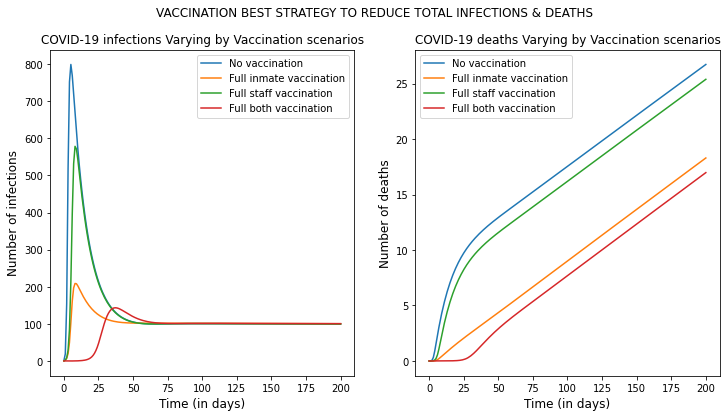

In [5]:
conta = 6
contb = 11

def f(y,t):
    Sa = y[0]
    Sb = y[1]
    Ia = y[2]
    Ib = y[3]
    Ra = y[4]
    Rb = y[5]
    Da = y[6]
    Db = y[7]
    Na = Sa + Ia + Ra + Da
    Nb = Sb + Ib + Rb + Db
    
    r_ia = conta * trans / Na
    r_ib = contb * trans / Nb
    r_ra = (1 - fatala) / inf_period
    r_rb = (1 - fatalb) / inf_period
    r_da = fatala / death_period
    r_db = fatalb / death_period
    rein_r = .01

    dSa = -r_ia * Sa * (2 * Ia + 1.5 * Ib) + rein_r * Ra
    dSb = -r_ib * Sb * (1.5 * Ia + Ib) + rein_r * Rb
    dIa = r_ia * Sa * (2 * Ia + 1.5 * Ib) - r_ra * Ia - r_da * Ia
    dIb = r_ib * Sb * (1.5 * Ia + Ib) - r_rb * Ib - r_db * Ib
    dRa = r_ra * Ia - rein_r * Ra
    dRb = r_rb * Ib - rein_r * Rb
    dDa = r_da * Ia
    dDb = r_db * Ib
    
    return[dSa, dSb, dIa, dIb, dRa, dRb, dDa, dDb]

Sa0_list = [749, 0, 749, 0]
Sb0_list = [249, 249, 0, 0]
Ia0_list = [1, 0, 1, 0]
Ib0_list = [1, 1, 0, 1]
Ra0_list = [0, 750, 0, 750]
Rb0_list = [0, 0, 250, 249]

labels = {0: 'No vaccination', 1: 'Full inmate vaccination', 2: 'Full staff vaccination', 3: 'Full both vaccination'}

fig = plt.figure(figsize = (12,6))
plt.tight_layout(pad = 5)
plt.subplot(1,2,1)

for i in range(4):
    Sa0 = Sa0_list[i]
    Sb0 = Sb0_list[i]
    Ia0 = Ia0_list[i]
    Ib0 = Ib0_list[i]
    Ra0 = Ra0_list[i]
    Rb0 = Rb0_list[i]
    Da0 = 0
    Db0 = 0
    y0=[Sa0, Sb0, Ia0, Ib0, Ra0, Rb0, Da0, Db0]
    
    solution=odeint(f, y0, t)
    Ia = solution[:,2]
    Ib = solution[:,3]
    I = Ia + Ib
    
    plt.plot(t, I, label = labels[i])
    
plt.legend(loc=0)
plt.xlabel('Time (in days)', fontsize=12)
plt.ylabel('Number of infections', fontsize=12)
plt.title('COVID-19 infections Varying by Vaccination scenarios')

plt.subplot(1,2,2)

for i in range(4):
    Sa0 = Sa0_list[i]
    Sb0 = Sb0_list[i]
    Ia0 = Ia0_list[i]
    Ib0 = Ib0_list[i]
    Ra0 = Ra0_list[i]
    Rb0 = Rb0_list[i]
    Da0 = 0
    Db0 = 0
    y0=[Sa0, Sb0, Ia0, Ib0, Ra0, Rb0, Da0, Db0]
    
    solution = odeint(f, y0, t)
    Da = solution[:,6]
    Db = solution[:,7]
    D = Da + Db
    
    plt.plot(t, D, label=labels[i])
    
plt.legend(loc=0)
plt.xlabel('Time (in days)', fontsize=12)
plt.ylabel('Number of deaths', fontsize=12)
fig.suptitle("VACCINATION BEST STRATEGY TO REDUCE TOTAL INFECTIONS & DEATHS")
plt.title('COVID-19 deaths Varying by Vaccination scenarios')
plt.savefig('Effect of various vaccination scenarios')
plt.show()

### Figure 3:
Shows total number of infections and deaths for various vaccination scenarios. The most effective vaccination campaign is fully vaccinating both inmates and staff, although prioritizing inmate vaccination is crucial.

## Recommendations
  As this COVID-19 pandemic continues on, there is a critical need to enact policies in a multi-pronged approach through masking and vaccination campaigns. As the results showed, depopulating prisons with social distancing alone has a small effect on reducing contact rate and slightly decreasing COVID-19 infections and deaths. The most significant impacts come from masking, or even more so from the synergistic interactions between both social distancing and mask wearing. Face masks have the most pronounced effect to flatten the curve when 60-80% of the population wear masks. It is important that prison facilities provide access to medical face masks and enforce mask wearing protocol for both staff and prisoners. Ideally, 100% of individual in prisons should be wearing masks properly to interfere with transmission of COVID-19 and reduce the contact rate theoretically to 0. We recognize the limitations to achieving 100% of the population due to medical or religious exemptions. However, this is a more likely option than social distancing in the prison setting, especially with time sensitive actions needing to be taken to prevent any more lives from being lost. There are also shortcomings to non-pharmaceutical responses because a lockdown of prisons or depopulating facility spaces for social distancing measures would only last for a short period of time to the severe impact on social and economic factors.

The shortcomings in healthcare access in prisons must also be addressed. With a history of mental health patients being deinstitutionalized and moved from inpatient facilities to outpatient care, many of these individuals without necessary supports for re-integration and assimilation into society landed in jails and prisons. We urge continued increases in allocation of funding for care, housing provisions, and social support to interrupt the prison pipeline for those experiencing mental illness. This will contribute to depopulating prisons and allowing for less overwhelmed capacities which have prevented successful social distancing measures. In the long run, these investments in social support services will be less expensive than incarcerating people at such high rates.

In response to the disproportionately higher rates of disease in inmates, it is essential to better equip providers for these medically-underserved populations and develop policies to mitigate these health disparities with improved access to and funding for treatment, reproductive health care, preventative health care, and mental health services. This must also be concurrent with reducing sentences for nonviolent and drug possession offenders who end up in circumstances further detrimental to their health.
